<a href="https://colab.research.google.com/github/rohanp2051/MalariaPredictionFromSatellite2020/blob/main/IbadanNDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipygee





In [ ]:
import ee
import folium 
#import geehydro
import numpy as np # yes, numpy!
import pandas as pd # yes, pandas!
#import proplot as plot 
import matplotlib.pyplot as plt 
from ipygee import*
from pandas.plotting import register_matplotlib_converters


In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=cP_e8bk5Y19J2uk6hRetFrJ1rRxA0e7gGw8oOOSNjyc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g5pam-YHkIM3wB-7lHrWQKfguGPFt0Cph6cwSK7xdH4bheDIKp9HYc

Successfully saved authorization token.


In [ ]:
wdpa_polygon = ee.FeatureCollection('WCMC/WDPA/current/polygons')
# select Ibadan on map
ibadan = wdpa_polygon.filter(ee.Filter.eq('NAME', 'Ibadan'))



In [ ]:
pip install geehydro

In [ ]:
import geehydro
Map = folium.Map(location=[7.4, 3.9], zoom_start=8)


In [ ]:
Map.addLayer(ibadan)
Map

In [ ]:
modis = ee.ImageCollection('MODIS/006/MOD13Q1')
modis = modis.filterDate(ee.DateRange('2000-01-01','2017-12-01'))

In [ ]:
evi = modis.select('EVI')
ndvi = modis.select('NDVI')



In [ ]:
def scale_factor(image):
# scale factor for the MODIS MOD13Q1 product
  return image.multiply(0.0001).copyProperties(image, ['system:time_start'])  


# mapping function to multiply by the scale factor
scaled_evi = evi.map(scale_factor)
scaled_ndvi = ndvi.map(scale_factor)


In [ ]:
Map.addLayer(scaled_ndvi.mean().clip(ibadan),
                  vis_params={'min': 0,
                              'max': 1,
                              'palette': ['red', 'yellow','green']})
Map




In [ ]:
xingu_ndvi = chart.Image.series(**{'imageCollection': scaled_ndvi,
                                   'region': ibadan,
                                   'reducer': ee.Reducer.mean(),
                                   'scale': 1000,
                                   'xProperty': 'system:time_start'})
xingu_ndvi.renderWidget(width='75%')



In [ ]:
print (xingu_ndvi.y_data.values())



dict_values([[(datetime.datetime(2000, 2, 18, 0, 0), 0.23456547911547918), (datetime.datetime(2000, 3, 5, 0, 0), 0.23843230958230963), (datetime.datetime(2000, 3, 21, 0, 0), 0.3560839066339067), (datetime.datetime(2000, 4, 6, 0, 0), 0.3169746928746929), (datetime.datetime(2000, 4, 22, 0, 0), 0.5620859950859951), (datetime.datetime(2000, 5, 8, 0, 0), 0.5863891891891893), (datetime.datetime(2000, 5, 24, 0, 0), 0.6114745700245702), (datetime.datetime(2000, 6, 9, 0, 0), 0.5948877149877151), (datetime.datetime(2000, 6, 25, 0, 0), 0.7001276412776415), (datetime.datetime(2000, 7, 11, 0, 0), 0.6010056511056512), (datetime.datetime(2000, 7, 27, 0, 0), 0.351995838587642), (datetime.datetime(2000, 8, 12, 0, 0), 0.6139296068796071), (datetime.datetime(2000, 8, 28, 0, 0), 0.2235038083538084), (datetime.datetime(2000, 9, 13, 0, 0), 0.4423608108108109), (datetime.datetime(2000, 9, 29, 0, 0), 0.2989239557739558), (datetime.datetime(2000, 10, 15, 0, 0), 0.671807248157248), (datetime.datetime(2000, 10, 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/malariadata/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/malariadata/foo.txt'

Hello Google Drive!

In [ ]:
import csv

In [ ]:
field_names = xingu_ndvi.y_data.values()
print (field_names)


dict_values([[(datetime.datetime(2000, 2, 18, 0, 0), 0.23456547911547918), (datetime.datetime(2000, 3, 5, 0, 0), 0.23843230958230963), (datetime.datetime(2000, 3, 21, 0, 0), 0.3560839066339067), (datetime.datetime(2000, 4, 6, 0, 0), 0.3169746928746929), (datetime.datetime(2000, 4, 22, 0, 0), 0.5620859950859951), (datetime.datetime(2000, 5, 8, 0, 0), 0.5863891891891893), (datetime.datetime(2000, 5, 24, 0, 0), 0.6114745700245702), (datetime.datetime(2000, 6, 9, 0, 0), 0.5948877149877151), (datetime.datetime(2000, 6, 25, 0, 0), 0.7001276412776415), (datetime.datetime(2000, 7, 11, 0, 0), 0.6010056511056512), (datetime.datetime(2000, 7, 27, 0, 0), 0.351995838587642), (datetime.datetime(2000, 8, 12, 0, 0), 0.6139296068796071), (datetime.datetime(2000, 8, 28, 0, 0), 0.2235038083538084), (datetime.datetime(2000, 9, 13, 0, 0), 0.4423608108108109), (datetime.datetime(2000, 9, 29, 0, 0), 0.2989239557739558), (datetime.datetime(2000, 10, 15, 0, 0), 0.671807248157248), (datetime.datetime(2000, 10, 

In [ ]:
for elem in xingu_ndvi.y_data.values():
    print(elem)

[(datetime.datetime(2000, 2, 18, 0, 0), 0.23456547911547918), (datetime.datetime(2000, 3, 5, 0, 0), 0.23843230958230963), (datetime.datetime(2000, 3, 21, 0, 0), 0.3560839066339067), (datetime.datetime(2000, 4, 6, 0, 0), 0.3169746928746929), (datetime.datetime(2000, 4, 22, 0, 0), 0.5620859950859951), (datetime.datetime(2000, 5, 8, 0, 0), 0.5863891891891893), (datetime.datetime(2000, 5, 24, 0, 0), 0.6114745700245702), (datetime.datetime(2000, 6, 9, 0, 0), 0.5948877149877151), (datetime.datetime(2000, 6, 25, 0, 0), 0.7001276412776415), (datetime.datetime(2000, 7, 11, 0, 0), 0.6010056511056512), (datetime.datetime(2000, 7, 27, 0, 0), 0.351995838587642), (datetime.datetime(2000, 8, 12, 0, 0), 0.6139296068796071), (datetime.datetime(2000, 8, 28, 0, 0), 0.2235038083538084), (datetime.datetime(2000, 9, 13, 0, 0), 0.4423608108108109), (datetime.datetime(2000, 9, 29, 0, 0), 0.2989239557739558), (datetime.datetime(2000, 10, 15, 0, 0), 0.671807248157248), (datetime.datetime(2000, 10, 31, 0, 0), 0.

In [ ]:
type (xingu_ndvi.dataframe)


pandas.core.frame.DataFrame

In [ ]:
!pip install proplot

     |████████████████████████████████| 7.9MB 7.5MB/s 


In [ ]:
import proplot as plot

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.


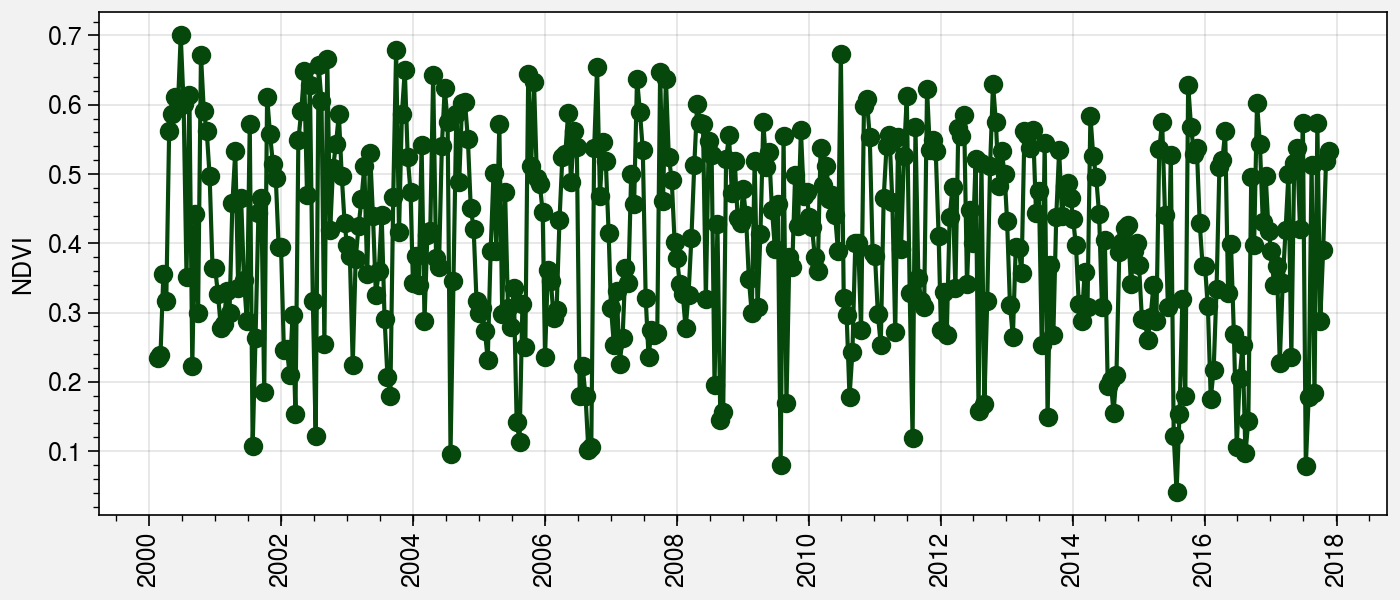

In [ ]:
fig, ax = plot.subplots(figsize=(7, 3), tight=True)
ax.plot(xingu_ndvi.dataframe.index, xingu_ndvi.dataframe['NDVI'],
        color='forest green', marker='o')
plot.show()

In [ ]:
xingu_ndvi_monthly = xingu_ndvi.dataframe.groupby(pd.Grouper(freq="M")).mean()

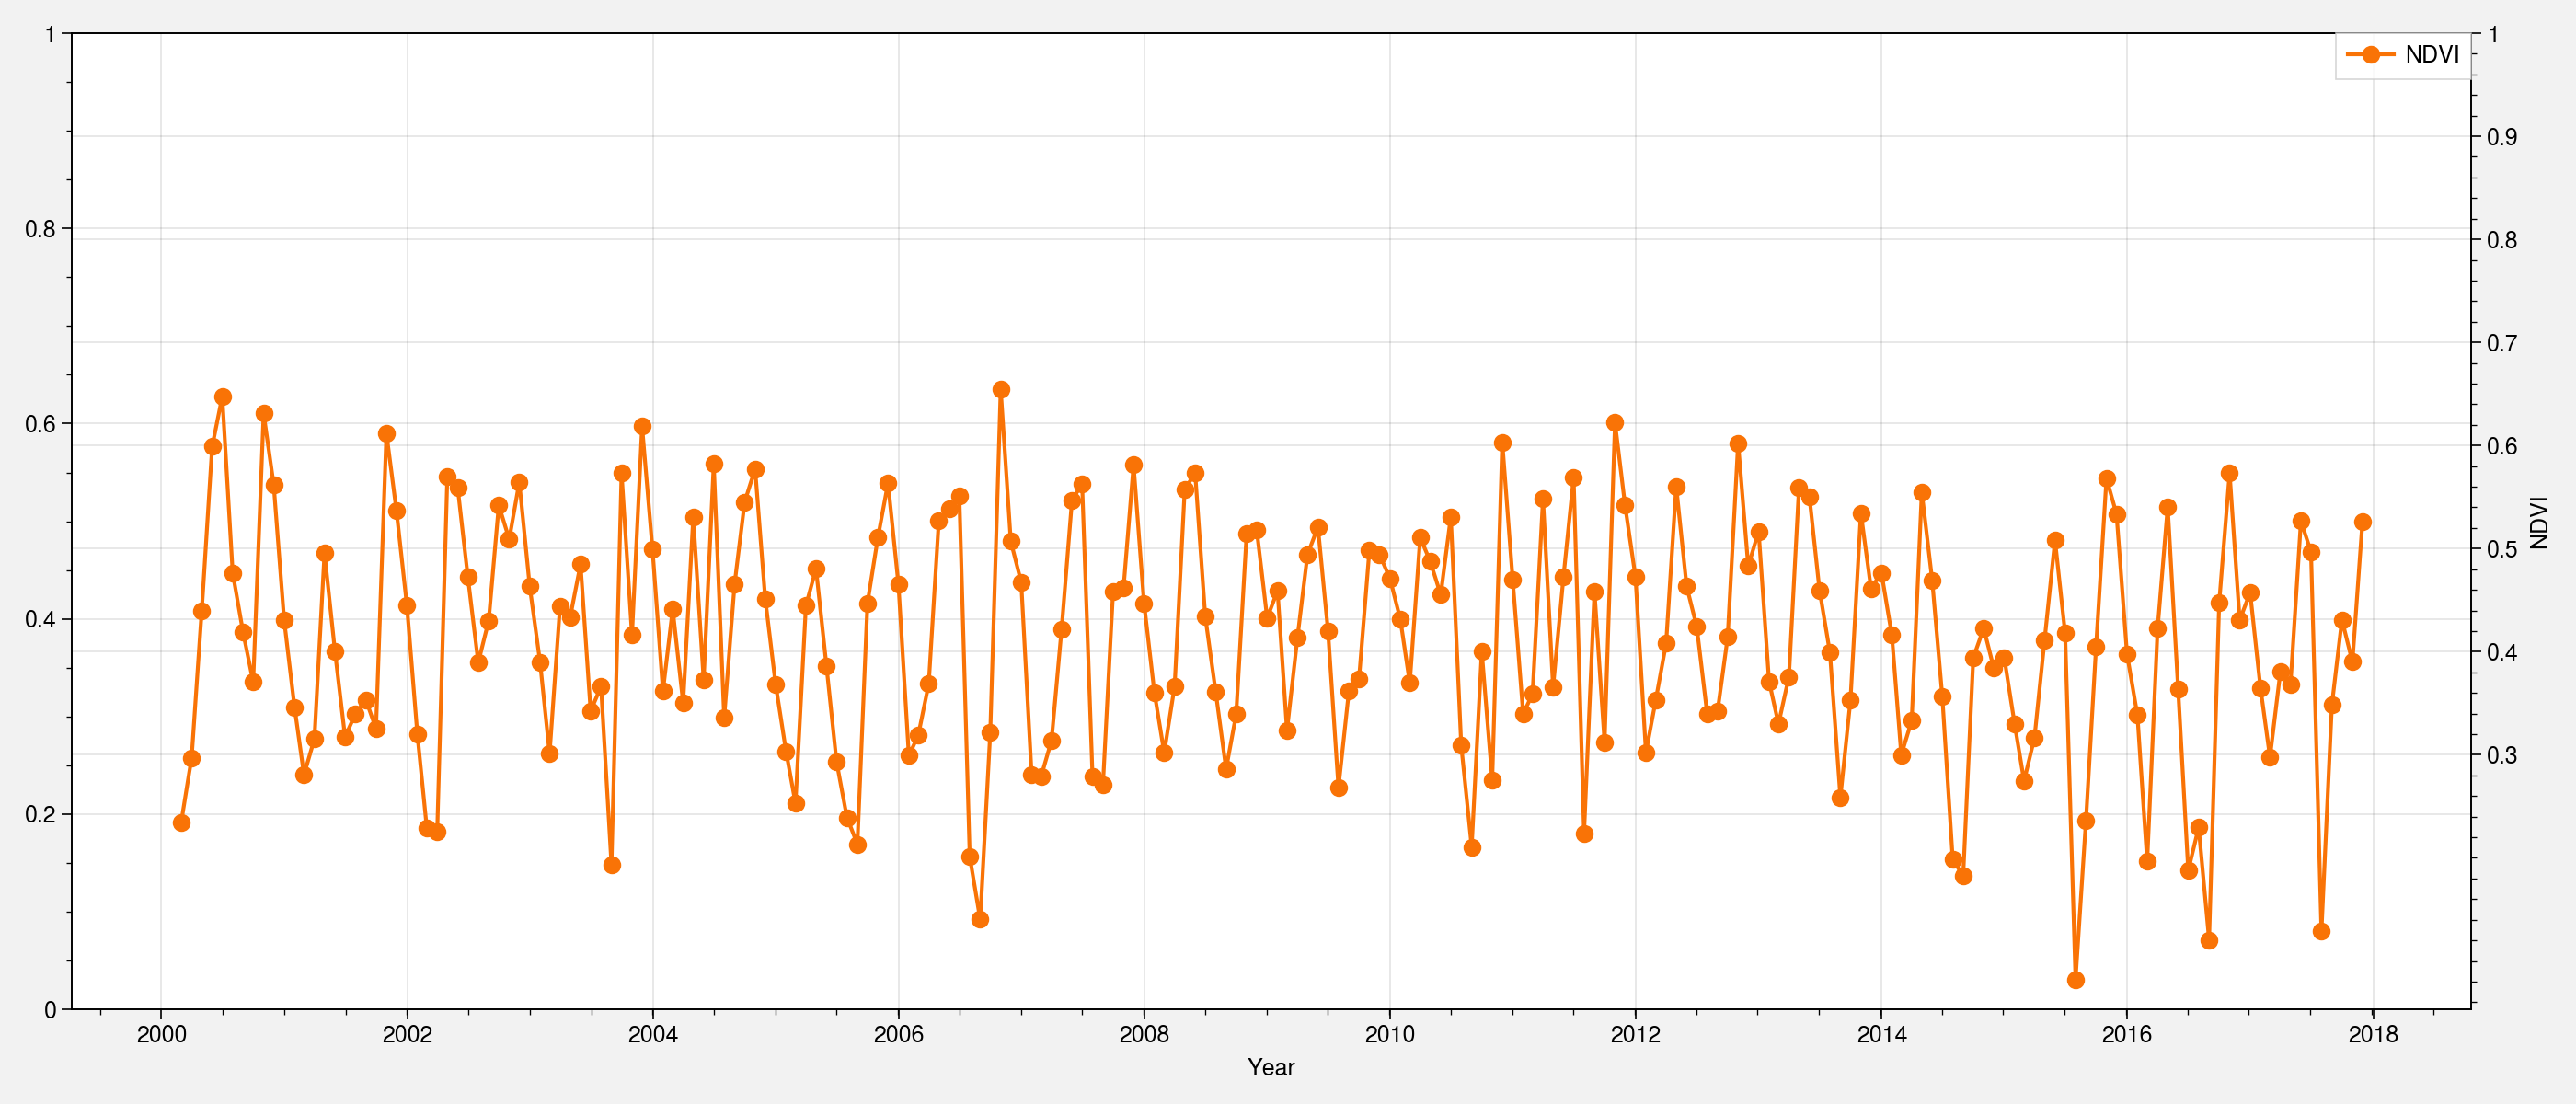

In [ ]:
# time index
time = xingu_ndvi_monthly.index
# plot
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()
# EVI
#ax1.plot(time, xingu_evi_monthly, label='EVI',
#         color='muddy brown', marker='+')
# NDVI
ax2.plot(time, xingu_ndvi_monthly, label='NDVI',
         color='orange', marker='o')
ax1.set_xlabel('Year')
#ax1.set_ylabel('EVI')
ax2.set_ylabel('NDVI')
#ax1.set_yticks(np.arange(0.3, 1.1, 0.1))
ax2.set_yticks(np.arange(0.3, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()